```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. 

```

# Filter-Based Feature Selection Methods
It is common to use correlation type statistical measures between input and output variables as the basis for filter feature selection. As such, the choice of statistical measures is highly dependent upon the variable data types:
- Numerical Variables
- Categorical Variables

`Input variables` are those that are provided as input to a model. In feature selection, it is this group of variables that we wish to reduce in size. `Output variables` are those for which a model is intended to predict, often called the response variable.
- Numerical Output: Regression predictive modeling problem.
- Categorical Output: Classification predictive modeling problem.


**Numerical Input, Numerical Output**
- This is a regression predictive modeling problem with numerical input variables.
- Pearson’s correlation coefficient (linear).
- Spearman’s rank coefficient (nonlinear)
- Mutual Information.
    
**Numerical Input, Categorical Output**
- This is a classification predictive modeling problem with numerical input variables.
- ANOVA correlation coefficient (linear).
- Kendall’s rank coefficient (nonlinear). Kendall does assume that the categorical variable is ordinal.
    
**Categorical Input, Categorical Output**
- This is a classification predictive modeling problem with categorical input variables.
- Chi-Squared test (contingency tables).
- Mutual Information. A powerful method that may prove useful for both categorical and numerical data. It is agnostic to the data types.
    
Two of the more popular `filter methods` include:
- Select the top k variables: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)
- Select the top percentile variables: [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html)

Consider `transforming the variables` in order to access different statistical methods. For example, you can transform a categorical variable to ordinal, even if it is not, and see if any interesting results come out. You can also make a numerical variable discrete (e.g. bins); try categorical-based measures. Some statistical measures assume properties of the variables, such as Pearson’s that assumes a Gaussian probability distribution to the observations and a linear relationship. You can transform the data to meet the expectations of the test and try the test regardless of the expectations and compare results.

**There is no best feature selection method.** Just like there is no best set of input variables or best machine learning algorithm. At least not universally. Instead, you must discover what works best for your specific problem using careful systematic experimentation. Try a range of different models fit on different subsets of features chosen via different statistical measures and discover what works best for your specific problem.

For more see:
- Other Feature Selection notebooks
- [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset
)

from feature_selection import (
    select_features
)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Regression (Numerical Input, Numerical Output)

There are a few feature selection techniques that can be used for numerical input data and a numerical target variable:

1. Correlation Statistics.
1. Mutual Information Statistics.

In [6]:
df_num = get_dataset('boston_housing')
df_num.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# Return a single boolean if there is any cell that is missing in a DataFrame
df_num.isna().any().any()

False

In [8]:
# This dataset contains no missing data
df_num.shape

(506, 14)

## Correlation Statistics
`Correlation` is a measure of how two variables change together. Perhaps the most common correlation measure is `Pearson’s correlation` that **assumes a Gaussian distribution to each variable** and reports on their linear relationship.

Linear correlation scores are typically a value between -1 and 1 with 0 representing no relationship. For feature selection, we are often interested in a positive score with the larger the positive value, the larger the relationship, and, more likely, the feature should be selected for modeling. As such the linear correlation can be converted into a correlation statistic with only positive values.

The results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The `scikit-learn` machine library provides an implementation of the correlation statistic in the `f_regression()` function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) class.

There are many different techniques for scoring features and selecting features based on scores; how do you know which one to use? **A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance**.

Other statistics:
- Pearson’s Correlation Coefficient: [f_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)
- ANOVA: [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html)
- Chi-Squared: [chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)
- Mutual Information: [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) and [mutual_info_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html)

Also, the `SciPy` library provides an implementation of many more statistics, such as Kendall’s tau ([kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)) and Spearman’s rank correlation ([spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)).

In [9]:
y = df_num[['medv']]
X = df_num.drop(columns=['medv'])

crim: 59.572821375021775
zn: 42.878752114207025
indus: 94.24923049039322
chas: 19.032607735130927
nox: 69.75204931831142
rm: 335.35136741900914
age: 49.301500310942544
dis: 21.767012238001648
rad: 61.14426820556828
tax: 90.53491248848346
ptratio: 112.47679094585716
b: 41.5684645765855
lstat: 444.6834916124672


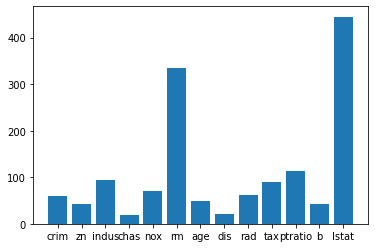

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train.values.ravel(), X_test, k=13, score_func=f_regression)

# What are scores for the features
for i in range(len(fs.scores_)):
    print(f'{X.columns[i]}: {fs.scores_[i]}')

# Plot the scores
plt.bar([X.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Mutual Information Feature Selection
Mutual information from the field of information theory is the application of `information gain` (typically used in the construction of decision trees) to feature selection. Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Mutual information is straightforward when considering the distribution of two discrete (categorical or ordinal) variables, such as categorical input and categorical output data. Nevertheless, [it can be adapted for use with numerical input and output data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3929353/).

The `scikit-learn` machine learning library provides an implementation of mutual information for feature selection with numeric input and output variables via the `mutual_info_regression()` function. Like `f_regression()`, it can be used in the [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) feature selection strategy (and other strategies).

crim: 0.33445158052671653
zn: 0.16826410824593796
indus: 0.4463173810898491
chas: 0.02076098080610911
nox: 0.41985979583057187
rm: 0.5141134898349624
age: 0.29459299284507656
dis: 0.2799449988396563
rad: 0.2069703052191132
tax: 0.309951751341901
ptratio: 0.47260930108054655
b: 0.12916096888243533
lstat: 0.7298075224090339


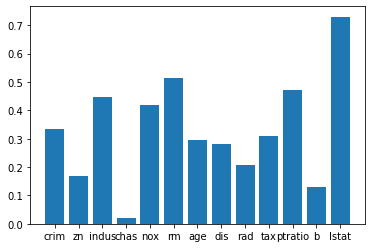

In [11]:
from sklearn.feature_selection import mutual_info_regression

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train.values.ravel(), X_test, k=13, score_func=mutual_info_regression)

# What are scores for the features
for i in range(len(fs.scores_)):
    print(f'{X.columns[i]}: {fs.scores_[i]}')

# Plot the scores
plt.bar([X.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Grid Search for Best k Features
Instead of guessing, we can systematically test a range of different numbers of selected features and discover which results in the best performing model. This is called a `grid search`, where the k argument to the `SelectKBest` class can be tuned.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

We can define a `Pipeline` that correctly prepares the feature selection `transform` on the training set and applies it to the train set and test set for each fold of the `cross-validation`.

In [13]:
# Define the pipeline to evaluate
model = LinearRegression()

fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel', fs), ('lr', model)])

Note that the grid is a dictionary mapping of parameter-to-values to search, and given that we are using a `Pipeline`, we can access the `SelectKBest` object via the name we gave it ‘sel‘ and then the parameter name ‘k‘ separated by two underscores, or ‘sel__k‘.

In [14]:
# Define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]

In this case, we will evaluate models using the negative mean absolute error (`neg_mean_absolute_error`). **It is negative because the scikit-learn requires the score to be maximized, so the MAE is made negative, meaning scores scale from -infinity to 0 (best)**.

In [15]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [16]:
# Define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# Perform the search
results = search.fit(X, y.values.ravel())

In [17]:
# Summarize best results
print(f'Best MAE: {results.best_score_}.3f')
print(f'Best Config: {results.best_params_}')

# Summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']

for mean, param in zip(means, params):
    print(f">{mean}.3f with: {param}")

Best MAE: -3.3907648113211915.3f
Best Config: {'sel__k': 13}
>nan.3f with: {'sel__k': -7}
>nan.3f with: {'sel__k': -6}
>nan.3f with: {'sel__k': -5}
>nan.3f with: {'sel__k': -4}
>nan.3f with: {'sel__k': -3}
>nan.3f with: {'sel__k': -2}
>nan.3f with: {'sel__k': -1}
>nan.3f with: {'sel__k': 0}
>-4.521747539614067.3f with: {'sel__k': 1}
>-4.002181149414203.3f with: {'sel__k': 2}
>-3.96884926718659.3f with: {'sel__k': 3}
>-3.924862164421501.3f with: {'sel__k': 4}
>-3.6935825247213483.3f with: {'sel__k': 5}
>-3.6793440089611105.3f with: {'sel__k': 6}
>-3.669819047197467.3f with: {'sel__k': 7}
>-3.6543203255523866.3f with: {'sel__k': 8}
>-3.555621158604438.3f with: {'sel__k': 9}
>-3.5405074362298214.3f with: {'sel__k': 10}
>-3.4744323318111348.3f with: {'sel__k': 11}
>-3.398212536660369.3f with: {'sel__k': 12}
>-3.3907648113211915.3f with: {'sel__k': 13}


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
>1 -4.521747539614067.3f (0.4822804147288693.3f)
>2 -4.002181149414203.3f (0.5207608982997407.3f)
>3 -3.98164512367862.3f (0.5466239804872821.3f)
>4 -3.8726796720538905.3f (0.5633599471139331.3f)
>5 -3.6935825247213483.3f (0.5416963973719753.3f)
>6 -3.6755337472719734.3f (0.5501442068637822.3f)
>7 -3.667973727151764.3f (0.5517726961977683.3f)
>8 -3.64762031509766.3f (0.5111268705795948.3f)
>9 -3.555621158604438.3f (0.5219961977035131.3f)
>10 -3.547513154155012.3f (0.4870297636972449.3f)
>11 -3.4856946037810728.3f (0.5064099956800262.3f)
>12 -3.398212536660369.3f (0.5206002009263248.3f)
>13 -3.3907648113211915.3f (0.5296850487850864.3f)


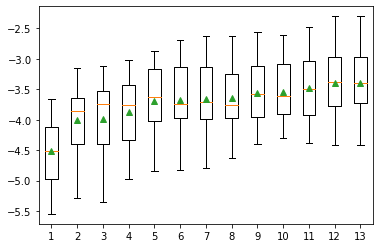

In [18]:
# Compare different numbers of features selected using mutual information
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot


# Define number of features to evaluate
num_features = [i for i in range(1, X.shape[1]+1)]
print(num_features)

# Enumerate each number of features
results = list()

for k in num_features:
    
    # Create pipeline
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

    # Evaluate the model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y.values.ravel(), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results.append(scores)

    # Summarize the results
    print(f'>{k} {mean(scores)}.3f ({std(scores)}.3f)')

# Plot model performance for comparison
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

Box and whisker plots are created side by side showing the trend of `k vs. MAE` where the green triangle represents the `mean` and orange line represents the `median` of the distribution. Running the example `grid searches` different numbers of selected features using `mutual information statistics`, where each modeling pipeline is evaluated using repeated `cross-validation`.

## Classification (Numerical Input, Categorical Output)
Feature selection is performed using [ANOVA F](https://en.wikipedia.org/wiki/F-test) measure via the [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) function.

In [26]:
df = get_dataset('titanic3')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num = df_num.drop('body', axis=1)
df_num.dropna(inplace=True)
df_num.head()

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


In [27]:
# Return a single boolean if there is any cell that is missing in a DataFrame
df_num.isna().any().any()

False

In [28]:
# This dataset contains no missing data
df_num.shape

(1045, 6)

In [29]:
y = df_num[['survived']]
X = df_num.drop(columns=['survived'])

pclass: 87.3920642584026
age: 4.123413289361909
sibsp: 0.3288419745557903
parch: 10.49270358649506
fare: 45.51235371987443


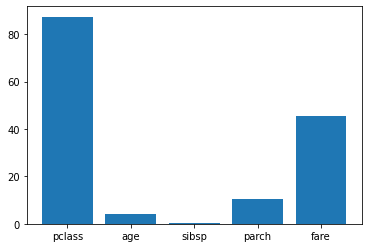

In [30]:
from sklearn.feature_selection import f_classif

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train.values.ravel(), X_test, k=5, score_func=f_classif)

# What are scores for the features
for i in range(len(fs.scores_)):
    print(f'{X.columns[i]}: {fs.scores_[i]}')

# Plot the scores
plt.bar([X.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()